<a href="https://colab.research.google.com/github/abdelrahmanzahran74/Data-Analysis-Projects/blob/main/Emp_PerformancePred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. **Firstly Connect to your Google Drive**


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!pwd #print the full path of the current directory
!ls #show files
!python --version #print python version

/content
drive  sample_data
Python 3.8.16


**Download and Install PySpark**


In [8]:
!wget https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop2.7.tgz

--2022-12-31 17:51:00--  https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop2.7.tgz
Resolving archive.apache.org (archive.apache.org)... 138.201.131.134, 2a01:4f8:172:2ec5::2
Connecting to archive.apache.org (archive.apache.org)|138.201.131.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 220272364 (210M) [application/x-gzip]
Saving to: ‘spark-3.0.0-bin-hadoop2.7.tgz’

spark-3.0.0-bin-had 100%[===================>] 210.07M  19.8MB/s    in 12s     

2022-12-31 17:51:12 (18.0 MB/s) - ‘spark-3.0.0-bin-hadoop2.7.tgz’ saved [220272364/220272364]



**Download Data and extract it**

In [26]:
!wget https://www.kaggle.com/datasets/gauravduttakiit/employee-performance-prediction/download?datasetVersionNumber=1
!tar -xvzf spark-3.0.0-bin-hadoop2.7.tgz
!pip install findspark

--2022-12-31 18:15:22--  https://www.kaggle.com/datasets/gauravduttakiit/employee-performance-prediction/download?datasetVersionNumber=1
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=datasetsWelcome&returnUrl=%2Fdatasets%2Fgauravduttakiit%2Femployee-performance-prediction%2Fversions%2F1%3Fresource%3Ddownload [following]
--2022-12-31 18:15:22--  https://www.kaggle.com/account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=datasetsWelcome&returnUrl=%2Fdatasets%2Fgauravduttakiit%2Femployee-performance-prediction%2Fversions%2F1%3Fresource%3Ddownload
Reusing existing connection to www.kaggle.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘download?datasetVersionNumber=1.3’

download

In [13]:
import os
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop2.7"
import findspark
findspark.init()

# **DataSet**: Employee Performance Prediction


**Link**: https://www.kaggle.com/datasets/gauravduttakiit/employee-performance-prediction/download?datasetVersionNumber=1

# **About this file**
This dataset includes important attributes of the garment manufacturing process and the productivity of the employees which had been collected manually and also been validated by the industry experts.


# Exploratory Data Analysis

In [14]:
from pyspark.sql import SparkSession

In [27]:
spark = SparkSession.builder.appName("Employee Project").getOrCreate()

In [28]:
path = '/content/drive/MyDrive/DataSet/Employee_Performance_Prediction.csv'
df = spark.read.csv(path, header=True, inferSchema=True)

In [29]:
df.show(10)

+----+---------------------+-----+------+---------+---------+---------+--------+------------------+-------------+-----+----------------+----------------+----------------+----------------+----------------+--------------------+---------------------+-----------------+----------+------------+----------+------------+-----------+-------------+-------------------+
|team|targeted_productivity|  smv|   wip|over_time|incentive|idle_time|idle_men|no_of_style_change|no_of_workers|month|quarter_Quarter1|quarter_Quarter2|quarter_Quarter3|quarter_Quarter4|quarter_Quarter5|department_finishing|department_finishing |department_sweing|day_Monday|day_Saturday|day_Sunday|day_Thursday|day_Tuesday|day_Wednesday|actual_productivity|
+----+---------------------+-----+------+---------+---------+---------+--------+------------------+-------------+-----+----------------+----------------+----------------+----------------+----------------+--------------------+---------------------+-----------------+----------+----

In [30]:
df.printSchema() 

root
 |-- team: integer (nullable = true)
 |-- targeted_productivity: double (nullable = true)
 |-- smv: double (nullable = true)
 |-- wip: double (nullable = true)
 |-- over_time: integer (nullable = true)
 |-- incentive: integer (nullable = true)
 |-- idle_time: double (nullable = true)
 |-- idle_men: integer (nullable = true)
 |-- no_of_style_change: integer (nullable = true)
 |-- no_of_workers: double (nullable = true)
 |-- month: integer (nullable = true)
 |-- quarter_Quarter1: integer (nullable = true)
 |-- quarter_Quarter2: integer (nullable = true)
 |-- quarter_Quarter3: integer (nullable = true)
 |-- quarter_Quarter4: integer (nullable = true)
 |-- quarter_Quarter5: integer (nullable = true)
 |-- department_finishing: integer (nullable = true)
 |-- department_finishing : integer (nullable = true)
 |-- department_sweing: integer (nullable = true)
 |-- day_Monday: integer (nullable = true)
 |-- day_Saturday: integer (nullable = true)
 |-- day_Sunday: integer (nullable = true)
 |

In [31]:
df.count() #no of rows

1017

In [32]:
df.groupBy("team").sum("over_time").show() #OverTime by each team 

+----+--------------+
|team|sum(over_time)|
+----+--------------+
|  12|        285875|
|   1|        403710|
|   6|        280125|
|   3|        475650|
|   5|        397740|
|   9|        411660|
|   4|        468840|
|   8|        383670|
|   7|        370050|
|  10|        388470|
|  11|        320640|
|   2|        423570|
+----+--------------+



In [51]:
df.groupBy("team").sum("targeted_productivity").show() #Productiviy by each team 
df.groupBy("team").sum("actual_productivity").show() #Productiviy by each team 

+----+--------------------------+
|team|sum(targeted_productivity)|
+----+--------------------------+
|  12|         64.04999999999994|
|   1|         64.04999999999995|
|   6|         58.89999999999997|
|   3|         62.84999999999995|
|   5|        50.550000000000004|
|   9|         68.79999999999994|
|   4|         60.69999999999999|
|   8|         65.30000000000001|
|   7|                     56.72|
|  10|                      63.7|
|  11|         55.94999999999998|
|   2|         71.59999999999997|
+----+--------------------------+

+----+------------------------+
|team|sum(actual_productivity)|
+----+------------------------+
|  12|      63.955967011000006|
|   1|       70.26967262499998|
|   6|       54.91360434799999|
|   3|            67.825646967|
|   5|       52.36209297100001|
|   9|       65.68405708600004|
|   4|            66.686696828|
|   8|      62.672079325000006|
|   7|       53.35924931099997|
|  10|       61.50962069600001|
|  11|            54.512379044|
|   2| 

In [42]:
df_sort = df.sort("team").groupby("team").sum().show()

+----+---------+--------------------------+------------------+--------+--------------+--------------+--------------+-------------+-----------------------+------------------+----------+---------------------+---------------------+---------------------+---------------------+---------------------+-------------------------+--------------------------+----------------------+---------------+-----------------+---------------+-----------------+----------------+------------------+------------------------+
|team|sum(team)|sum(targeted_productivity)|          sum(smv)|sum(wip)|sum(over_time)|sum(incentive)|sum(idle_time)|sum(idle_men)|sum(no_of_style_change)|sum(no_of_workers)|sum(month)|sum(quarter_Quarter1)|sum(quarter_Quarter2)|sum(quarter_Quarter3)|sum(quarter_Quarter4)|sum(quarter_Quarter5)|sum(department_finishing)|sum(department_finishing )|sum(department_sweing)|sum(day_Monday)|sum(day_Saturday)|sum(day_Sunday)|sum(day_Thursday)|sum(day_Tuesday)|sum(day_Wednesday)|sum(actual_productivity)|


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

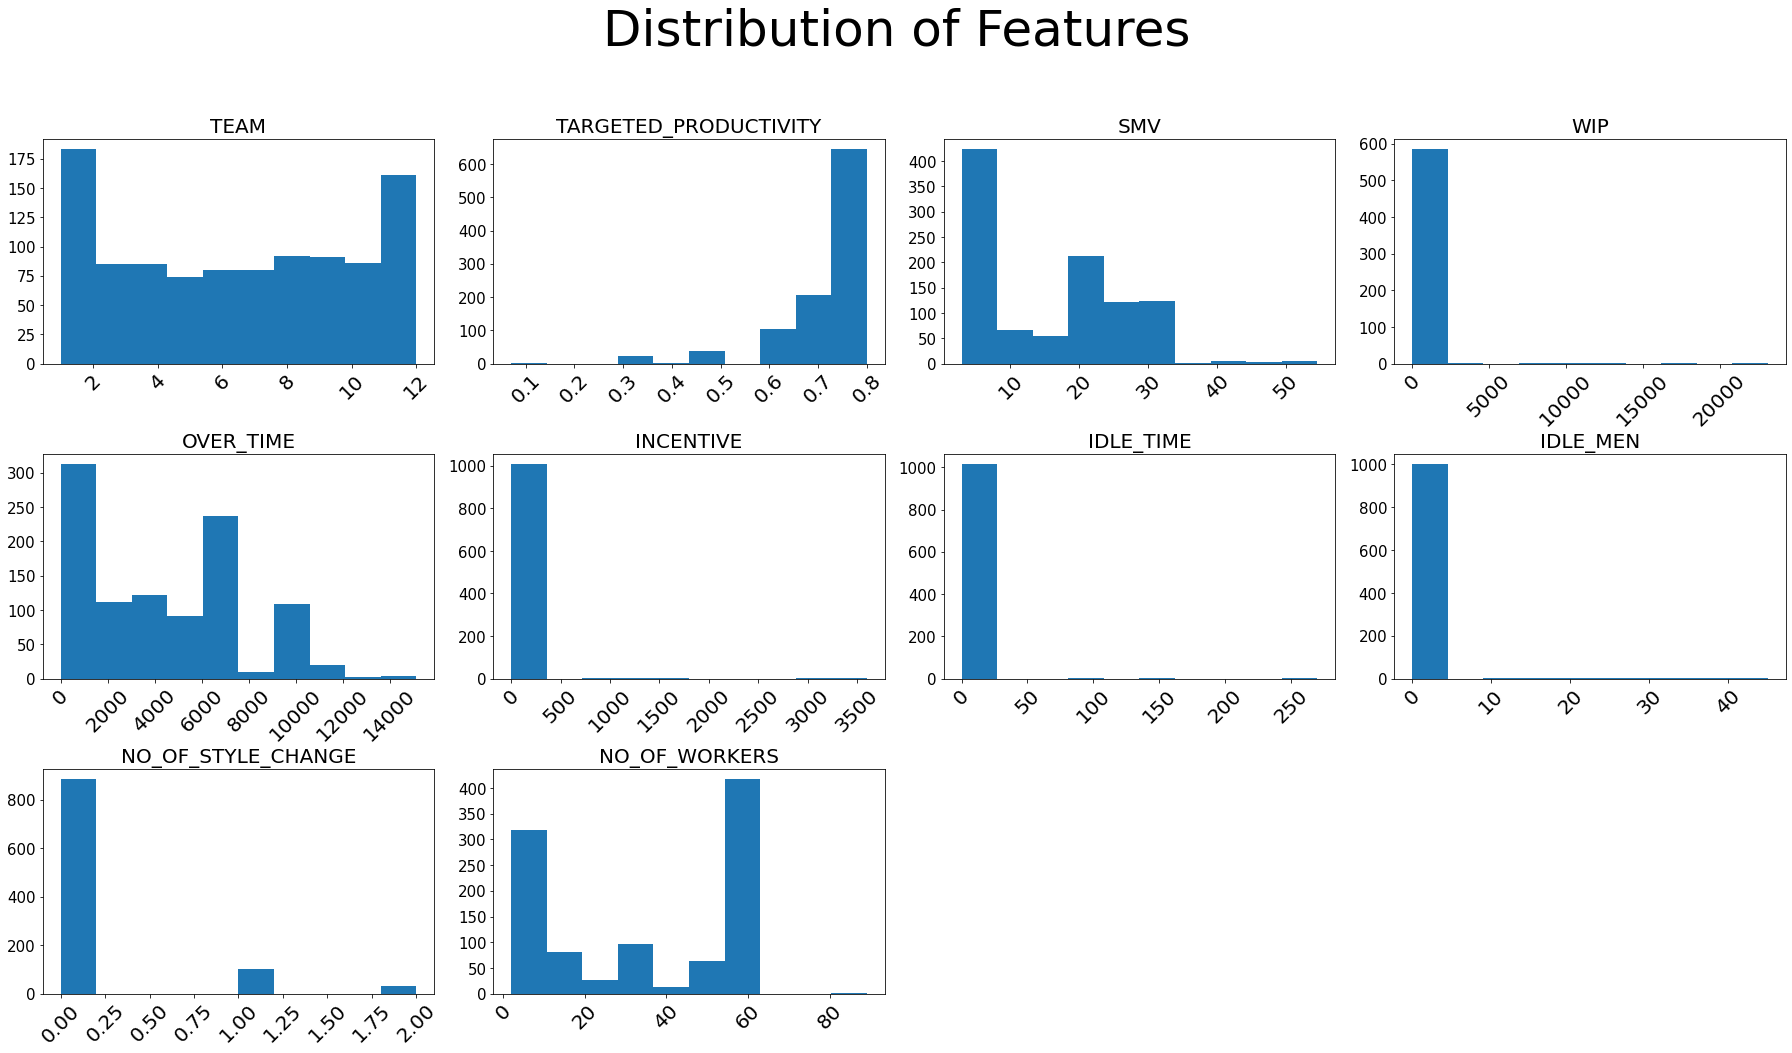

In [44]:
fig = plt.figure(figsize=(25, 15))
st = fig.suptitle("Distribution of Features", fontsize=50, verticalalignment="center")
for col, num in zip(df.toPandas().describe().columns, range(1,11)):
  ax = fig.add_subplot(3,4, num)
  ax.hist(df.toPandas()[col])
  plt.grid(False)
  plt.xticks(rotation=45, fontsize=20)
  plt.yticks(fontsize=15)
  plt.title(col.upper(), fontsize=20)

plt.tight_layout()
st.set_y(0.95)
fig.subplots_adjust(top=0.85, hspace=0.4)
plt.show()


In [45]:
from pyspark.sql.functions import isnan, when, count, col #IS NULL , WHEN, COUNT, Column

In [47]:
df.select([count(when(isnan(c),c)).alias(c) for c in df.columns]).toPandas().head()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,actual_productivity
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


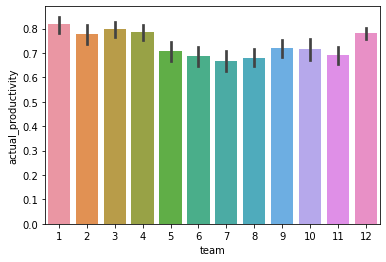

In [65]:
sns.barplot(x="team", y="actual_productivity",data=df.toPandas());

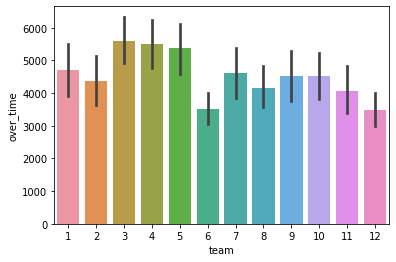

In [73]:
sns.barplot(x="team", y="over_time",data=df.toPandas());

In [75]:
import findspark
findspark.init()
import pyspark 
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext

In [89]:
#Creating Table
df.registerTempTable('test')
sqlContext = SQLContext(spark)
#Running Query
df1 = sqlContext.sql("SELECT * from test").toPandas()
df2 = sqlContext.sql("SELECT team, sum(actual_productivity) from test group by team").toPandas()


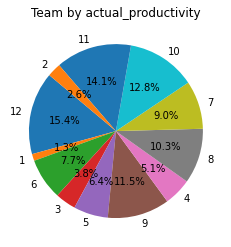

In [90]:
fig = plt.pie(df2['team'], autopct='%1.1f%%', startangle=140,labels=df2['team'])
plt.title('Team by actual_productivity')
plt.show()

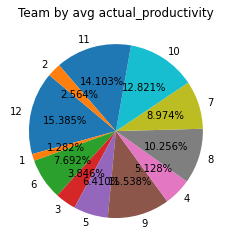

In [97]:
df3 = sqlContext.sql("SELECT team, avg(actual_productivity) from test group by team").toPandas()
fig = plt.pie(df3['team'], autopct='%1.3f%%', startangle=140,labels=df3['team'])
plt.title('Team by avg actual_productivity');

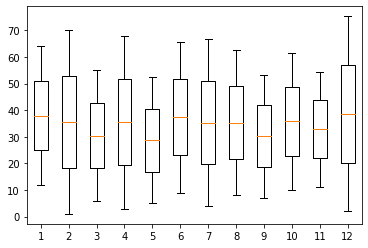

In [101]:
#box plot
plt.boxplot(df2)
plt.show()

# Correlation Matrix

In [100]:
df1.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-100-2e6bfec4ae5d>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df1.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,month,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,actual_productivity
team,1.00,0.05,-0.12,-0.01,-0.11,-0.01,-0.01,0.03,-0.01,-0.08,0.01,-0.03,-0.00,0.02,0.01,0.01,0.00,-0.03,0.03,-0.01,-0.00,0.01,-0.02,0.01,0.00,-0.16
targeted_productivity,0.05,1.00,-0.06,0.06,-0.07,0.03,-0.08,-0.06,-0.23,-0.08,-0.08,0.09,0.03,-0.04,-0.08,-0.03,-0.01,0.07,-0.05,-0.01,0.02,0.05,-0.07,0.01,-0.01,0.40
smv,-0.12,-0.06,1.00,-0.04,0.68,0.01,0.06,0.11,0.31,0.91,0.02,0.01,-0.02,0.05,-0.03,-0.02,-0.51,-0.54,0.87,0.01,-0.04,0.00,-0.00,0.02,0.01,-0.13
wip,-0.01,0.06,-0.04,1.00,0.03,0.16,-0.03,-0.05,-0.07,0.02,0.01,0.14,-0.08,-0.04,-0.03,-0.00,nan,nan,nan,0.24,-0.04,-0.04,-0.05,-0.05,-0.06,0.13
over_time,-0.11,-0.07,0.68,0.03,1.00,-0.02,0.03,-0.03,0.06,0.73,-0.23,0.01,-0.06,0.05,0.03,-0.05,-0.42,-0.41,0.68,-0.01,-0.01,-0.00,0.07,-0.01,-0.04,-0.03
incentive,-0.01,0.03,0.01,0.16,-0.02,1.00,-0.01,-0.02,-0.03,0.03,0.13,-0.04,0.13,-0.05,-0.05,-0.01,0.09,-0.12,0.03,0.19,-0.04,-0.04,-0.04,-0.03,-0.04,0.07
idle_time,-0.01,-0.08,0.06,-0.03,0.03,-0.01,1.00,0.49,-0.01,0.06,0.02,0.08,-0.04,-0.02,-0.03,-0.01,-0.03,-0.03,0.05,-0.02,0.05,-0.02,-0.02,-0.02,0.04,-0.06
idle_men,0.03,-0.06,0.11,-0.05,-0.03,-0.02,0.49,1.00,0.15,0.11,0.09,0.04,-0.08,0.09,-0.03,-0.02,-0.06,-0.06,0.10,-0.04,-0.01,0.02,0.01,0.02,0.01,-0.19
no_of_style_change,-0.01,-0.23,0.31,-0.07,0.06,-0.03,-0.01,0.15,1.00,0.33,0.23,-0.19,-0.02,0.09,0.19,-0.07,-0.18,-0.19,0.31,-0.01,0.00,-0.03,0.01,0.01,0.02,-0.22
no_of_workers,-0.08,-0.08,0.91,0.02,0.73,0.03,0.06,0.11,0.33,1.00,0.01,0.03,-0.04,0.05,-0.02,-0.04,-0.55,-0.59,0.94,0.02,-0.05,-0.02,0.01,0.02,0.01,-0.05


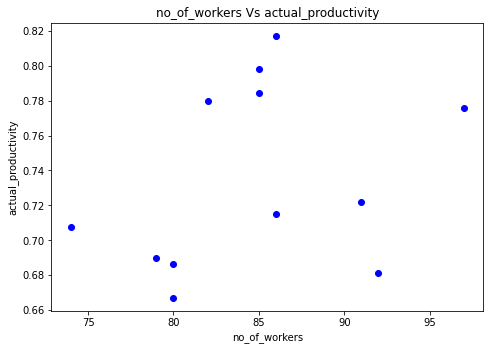

In [110]:
df4 = sqlContext.sql("SELECT team, count(no_of_workers) as a, avg(actual_productivity) as b from test group by team").toPandas()
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df4['a'],df4['b'], color='b')
ax.set_xlabel('no_of_workers')
ax.set_ylabel('actual_productivity')
ax.set_title('scatter plot')
plt.title('no_of_workers Vs actual_productivity')
plt.show()

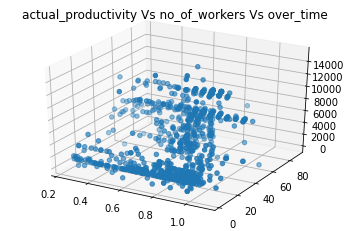

In [111]:
df5 = sqlContext.sql("SELECT actual_productivity, no_of_workers, over_time from test").toPandas()
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(df5['actual_productivity'], df5['no_of_workers'], df5['over_time'])
ax.set_title('actual_productivity Vs no_of_workers Vs over_time')
plt.show()

## Correlation

In [69]:
col_names = numeric_features_df.columns
features = numeric_features_df.rdd.map(lambda row: row[0:])

In [70]:
from pyspark.mllib.stat import Statistics
import pandas as pd

In [71]:
corr_mat = Statistics.corr(features, method="pearson")
corr_df = pd.DataFrame(corr_mat)
corr_df.index = col_names
corr_df.columns = col_names
round(corr_df, 2)

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,actual_productivity
team,1.00,0.05,-0.12,NaN,-0.11,-0.01,-0.01,0.03,-0.01,-0.08,...,0.00,-0.03,0.03,-0.01,-0.00,0.01,-0.02,0.01,0.00,-0.16
targeted_productivity,0.05,1.00,-0.06,NaN,-0.07,0.03,-0.08,-0.06,-0.23,-0.08,...,-0.01,0.07,-0.05,-0.01,0.02,0.05,-0.07,0.01,-0.01,0.40
smv,-0.12,-0.06,1.00,NaN,0.68,0.01,0.06,0.11,0.31,0.91,...,-0.51,-0.54,0.87,0.01,-0.04,0.00,-0.00,0.02,0.01,-0.13
wip,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
over_time,-0.11,-0.07,0.68,NaN,1.00,-0.02,0.03,-0.03,0.06,0.73,...,-0.42,-0.41,0.68,-0.01,-0.01,-0.00,0.07,-0.01,-0.04,-0.03
incentive,-0.01,0.03,0.01,NaN,-0.02,1.00,-0.01,-0.02,-0.03,0.03,...,0.09,-0.12,0.03,0.19,-0.04,-0.04,-0.04,-0.03,-0.04,0.07
idle_time,-0.01,-0.08,0.06,NaN,0.03,-0.01,1.00,0.49,-0.01,0.06,...,-0.03,-0.03,0.05,-0.02,0.05,-0.02,-0.02,-0.02,0.04,-0.06
idle_men,0.03,-0.06,0.11,NaN,-0.03,-0.02,0.49,1.00,0.15,0.11,...,-0.06,-0.06,0.10,-0.04,-0.01,0.02,0.01,0.02,0.01,-0.19
no_of_style_change,-0.01,-0.23,0.31,NaN,0.06,-0.03,-0.01,0.15,1.00,0.33,...,-0.18,-0.19,0.31,-0.01,0.00,-0.03,0.01,0.01,0.02,-0.22
no_of_workers,-0.08,-0.08,0.91,NaN,0.73,0.03,0.06,0.11,0.33,1.00,...,-0.55,-0.59,0.94,0.02,-0.05,-0.02,0.01,0.02,0.01,-0.05


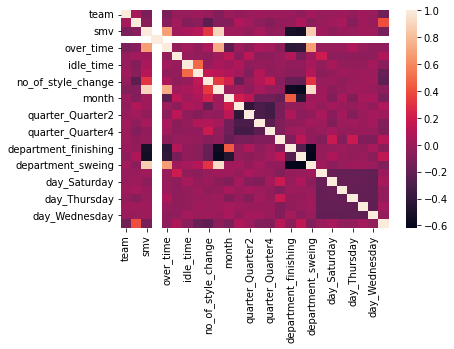

In [72]:
sns.heatmap(corr_df);